In [ ]:
!pip install matplotlib

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("bank_transactions.csv")

In [32]:
df

,date,Month Name,category,operation,sum,abs_sum,is_expense,balance
0,27-12-25,December,Зарахування,"Кешбек 8.06UAH. (ПДФО 1.45UAH, ВЗ 0.4UAH)",6.21,6.21,0,-28452.49
1,25-12-25,December,Зарахування зі своєї картки,Зі своєї картки *9770,400.00,400.00,0,-28458.70
2,25-12-25,December,Зарахування зі своєї картки,Зі своєї картки *9770,35.18,35.18,0,-28858.70
3,25-12-25,December,Зарахування зі своєї картки,Зі своєї картки *9770,22871.07,22871.07,0,-28893.88
4,24-12-25,December,Заощадження,Зарахування зі Скарбнички,7.09,7.09,0,-51764.95
...,...,...,...,...,...,...,...,...
1061,02-01-25,January,Зарахування,"Кешбек 16.51UAH. (ПДФО 2.97UAH, ВЗ 0.83UAH)",12.71,12.71,0,-2935.02
1062,02-01-25,January,Супермаркети та продукти,АТБ,-550.49,550.49,1,-2947.73
1063,02-01-25,January,Зарахування зі своєї картки,Зі своєї картки *9770,7.00,7.00,0,-2397.24
1064,01-01-25,January,Заощадження,Зарахування зі Скарбнички,8.15,8.15,0,-2404.24


In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1066 non-null   object 
 1   Month Name  1066 non-null   object 
 2   category    1066 non-null   object 
 3   operation   1066 non-null   object 
 4   sum         1066 non-null   float64
 5   abs_sum     1066 non-null   float64
 6   is_expense  1066 non-null   int64  
 7   balance     1066 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 66.8+ KB


In [35]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\MegaNotik\AppData\Local\Temp\ipykernel_9588\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1066 non-null   datetime64[ns]
 1   Month Name  1066 non-null   object        
 2   category    1066 non-null   object        
 3   operation   1066 non-null   object        
 4   sum         1066 non-null   float64       
 5   abs_sum     1066 non-null   float64       
 6   is_expense  1066 non-null   int64         
 7   balance     1066 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 66.8+ KB


In [37]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1066 non-null   datetime64[ns]
 1   month_name  1066 non-null   object        
 2   category    1066 non-null   object        
 3   operation   1066 non-null   object        
 4   sum         1066 non-null   float64       
 5   abs_sum     1066 non-null   float64       
 6   is_expense  1066 non-null   int64         
 7   balance     1066 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 66.8+ KB


In [39]:
df.isna().sum()

date          0
month_name    0
category      0
operation     0
sum           0
abs_sum       0
is_expense    0
balance       0
dtype: int64

In [40]:
# 1. Загальна сума поповнень за 2025 рік
total_topups_2025 = (
    df.loc[df["is_expense"] == 0, "abs_sum"]
      .sum()
)

metric_total_topups = {
    "metric": "total_topups_2025",
    "value": round(total_topups_2025, 2),
    "currency": "UAH"
}

In [41]:
# 2. Загальна сума витрат за 2025 рік

total_expenses_2025 = (
    df.loc[df["is_expense"] == 1, "abs_sum"]
      .sum()
)

# показник, готовий для JSON
metric_total_expenses = {
    "metric": "total_expenses_2025",
    "value": round(total_expenses_2025, 2),
    "currency": "UAH"
}

In [42]:
# 3. Чистий фінансовий результат за 2025 рік (поповнення − витрати)

net_financial_result_2025 = (
    total_topups_2025 - total_expenses_2025
)

# показник, готовий для JSON
metric_net_result = {
    "metric": "net_financial_result_2025",
    "value": round(net_financial_result_2025, 2),
    "currency": "UAH"
}

In [43]:
# 4. Динаміка витрат і поповнень по місяцях (за month_name)

monthly_summary = (
    df.groupby("month_name")
      .agg(
          total_topups=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 0].sum()),
          total_expenses=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 1].sum())
      )
      .reset_index()
)

# Для JSON формуємо список по місяцях
monthly_trends_json = [
    {
        "month": row["month_name"],
        "total_topups": round(row["total_topups"], 2),
        "total_expenses": round(row["total_expenses"], 2)
    }
    for _, row in monthly_summary.iterrows()
]

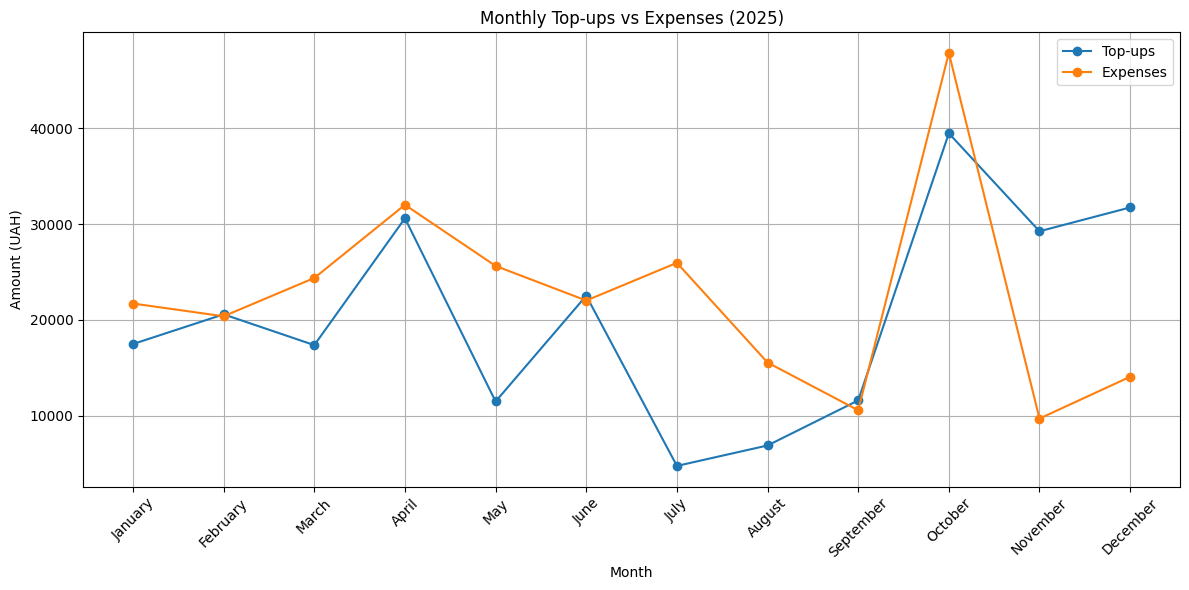

In [44]:
import matplotlib.pyplot as plt

# 4. Динаміка витрат і поповнень по місяцях з графіком

monthly_summary = (
    df.groupby("month_name")
      .agg(
          total_topups=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 0].sum()),
          total_expenses=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 1].sum())
      )
      .reindex([
          "January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"
      ])
      .reset_index()
)

# Графік
plt.figure(figsize=(12,6))
plt.plot(monthly_summary["month_name"], monthly_summary["total_topups"], marker='o', label="Top-ups")
plt.plot(monthly_summary["month_name"], monthly_summary["total_expenses"], marker='o', label="Expenses")
plt.title("Monthly Top-ups vs Expenses (2025)")
plt.xlabel("Month")
plt.ylabel("Amount (UAH)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("monthly_top_ups_expenses.png")
plt.show()

In [45]:
# 5. Структура витрат за категоріями (топ-категорії, частка у %)

# Фільтруємо лише витрати
expenses_df = df[df["is_expense"] == 1]

# Агрегуємо по категоріях
category_summary = (
    expenses_df.groupby("category")["abs_sum"]
               .sum()
               .sort_values(ascending=False)
               .reset_index()
)

# Додаємо колонку з часткою у відсотках
total_expenses = category_summary["abs_sum"].sum()
category_summary["share_pct"] = (category_summary["abs_sum"] / total_expenses * 100).round(2)

# Для JSON
category_share_json = [
    {
        "category": row["category"],
        "total_expense": round(row["abs_sum"], 2),
        "share_pct": row["share_pct"]
    }
    for _, row in category_summary.iterrows()
]

# Вивід топ-10 категорій для графіку
top_categories = category_summary.head(5)

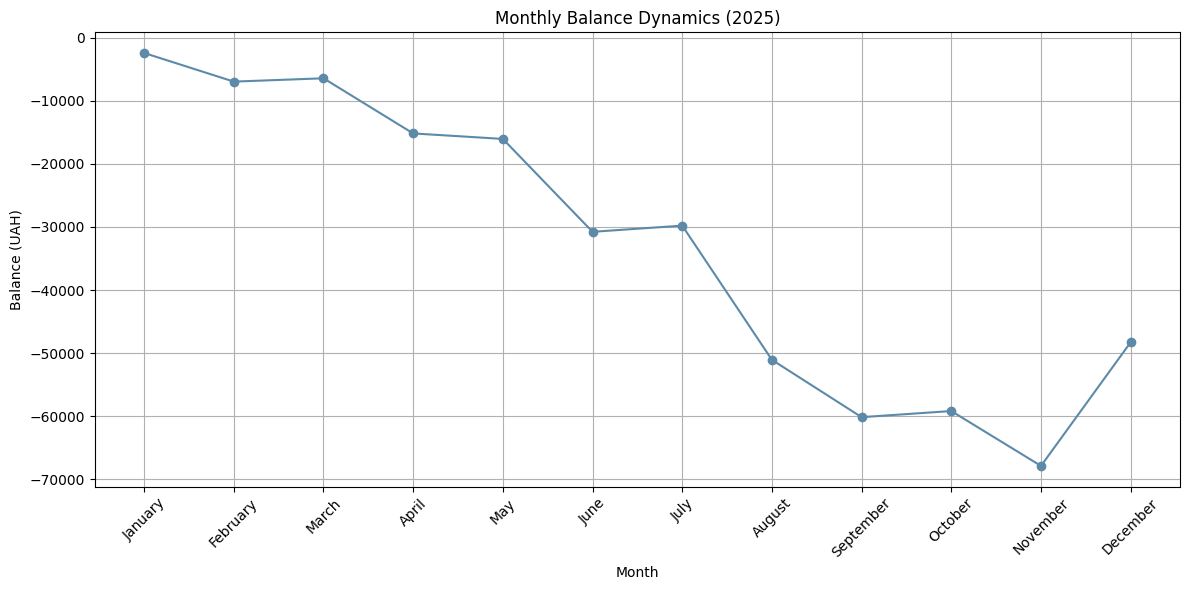

In [46]:
# 8. Динаміка балансу по місяцях (середнє або останнє значення місяця)

# Оберемо останнє значення балансу кожного місяця
monthly_balance = (
    df.groupby("month_name")["balance"]
      .last()
      .reindex([
          "January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"
      ])
      .reset_index()
)

# Для JSON
monthly_balance_json = [
    {
        "month": row["month_name"],
        "balance": round(row["balance"], 2)
    }
    for _, row in monthly_balance.iterrows()
]

# Графік динаміки балансу
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_balance["month_name"], monthly_balance["balance"], marker='o', color='#5D8AA8')
plt.title("Monthly Balance Dynamics (2025)")
plt.xlabel("Month")
plt.ylabel("Balance (UAH)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_balance_dynamics_2025.png", dpi=300)
plt.show()



In [47]:
# 9. Найбільша одноразова витрата
max_expense_row = df[df["is_expense"] == 1].sort_values("abs_sum", ascending=False).iloc[0]

max_expense = {
    "type": "expense",
    "date": str(max_expense_row["date"].date()),
    "category": max_expense_row["category"],
    "amount": round(max_expense_row["abs_sum"], 2),
    "balance_after": round(max_expense_row["balance"], 2)
}

# Найбільше одноразове поповнення
max_topup_row = df[df["is_expense"] == 0].sort_values("abs_sum", ascending=False).iloc[0]

max_topup = {
    "type": "top-up",
    "date": str(max_topup_row["date"].date()),
    "category": max_topup_row["category"],  # або "operation" якщо хочеш деталізацію
    "amount": round(max_topup_row["abs_sum"], 2),
    "balance_after": round(max_topup_row["balance"], 2)
}


In [48]:
# 10. Місяці з дефіцитом коштів (витрати > поповнення)

# Агрегуємо по місяцях
monthly_totals = (
    df.groupby("month_name")
      .agg(
          total_topups=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 0].sum()),
          total_expenses=("abs_sum", lambda x: x[df.loc[x.index, "is_expense"] == 1].sum())
      )
      .reindex([
          "January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"
      ])
      .reset_index()
)

# Визначаємо місяці з дефіцитом
deficit_months = monthly_totals[monthly_totals["total_expenses"] > monthly_totals["total_topups"]]

# Для JSON
deficit_months_json = [
    {
        "month": row["month_name"],
        "total_topups": round(row["total_topups"], 2),
        "total_expenses": round(row["total_expenses"], 2),
        "deficit_amount": round(row["total_expenses"] - row["total_topups"], 2)
    }
    for _, row in deficit_months.iterrows()
]


In [49]:
# Об’єднання всіх метрик в один фінальний об’єкт для AI-звіту

finance_report = {
    "report_type": "credit_card_financial_report",
    "period": "2025",

    "summary_metrics": {
        "total_topups": metric_total_topups,
        "total_expenses": metric_total_expenses,
        "net_result": metric_net_result
    },

    "monthly_analysis": {
        "topups_vs_expenses": monthly_trends_json,
        "balance_dynamics": monthly_balance_json,
        "deficit_months": deficit_months_json
    },

    "expense_structure": {
        "top_categories": [
            {
                "category": row["category"],
                "total_expense": round(row["abs_sum"], 2),
                "share_pct": row["share_pct"]
            }
            for _, row in top_categories.iterrows()
        ]
    },

    "charts": {
        "monthly_topups_vs_expenses": "monthly_top_ups_expenses.png",
        "top_expense_categories": "top10_expense_categories_2025.png",
        "monthly_balance": "monthly_balance_dynamics_2025.png"
    }
}

# Готово: finance_report можна напряму передавати в prompt / OpenAI API

In [50]:
import json
from openai import OpenAI
from dotenv import load_dotenv
import os

In [51]:
load_dotenv()

True

In [58]:
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)

In [59]:
PROMPT_V1 = """ You are a Senior Financial Analyst preparing an executive-level personal finance performance report for the credit card owner using the transaction dataset provided for the year 2025.

Rules:

Use ONLY the provided input dataset and aggregated JSON metrics derived from it (finance_report).

The dataset contains the following fields:
date, month_name, category, operation, sum, abs_sum, is_expense, balance.

Perform only aggregations, ratios, and consistency checks that can be derived directly from these fields.

Do NOT invent data, assumptions, income sources, or external benchmarks.

Ensure financial consistency:
- Expenses must be derived from is_expense = 1
- Top-ups must be derived from is_expense = 0
- Net result = total top-ups − total expenses

Explicitly flag any data inconsistencies, abnormal spikes, deficit months, or balance stress periods as financial risks.

Focus on financial decision support and actionable recommendations, not technical or descriptive explanations.

Required Output Format (Markdown only):

# Credit Card Financial Report (2025)

## Management Summary

Provide a concise executive overview answering:

- What is the overall financial result for the year (net surplus or deficit)
- How stable the cash flow is across months
- Which expense categories create the highest financial pressure
- In which months deficits occurred and why this matters
- What the card owner should prioritize to improve financial stability

## Executive Summary

Include only decision-critical metrics:

- Total Top-ups (annual)
- Total Expenses (annual)
- Net Financial Result
- Number and share of deficit months
- Top 3 expense categories by share
- Key financial risk or opportunity identified

## Key Financial Insights

Provide 4–6 insights. EACH insight must follow this structure:

Insight: A non-obvious financial pattern (spending behavior, volatility, category concentration, balance stress)
Why it matters: Financial implication for liquidity, savings, or risk exposure
Financial impact: Risk or opportunity for improving financial health

## Recommendations

Provide 3–5 prioritized, action-oriented recommendations:

- Target a specific expense category or spending behavior
- Reference a quantified issue (e.g., category share %, deficit months, volatility)
- Indicate expected financial effect (improved stability, reduced risk, better cash flow)

## Key Metrics

Present a concise executive list or table with:

- Total Top-ups
- Total Expenses
- Net Financial Result
- Monthly average expenses
- Months with deficits
- Top expense categories
- Balance minimum and maximum (if available)

## Data Limitations & Financial Risks

Explicitly state:

- Missing or unavailable dimensions (e.g., income source details, interest, fees)
- Data quality issues (missing months, inconsistent balances, outliers)
- Areas requiring further tracking or categorization for better financial control
"""

In [60]:
prompt = f"""
{PROMPT_V1}

INPUT DATA:
{finance_report}
"""

In [61]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a Senior Financial Analyst specializing in executive-level financial reports and actionable recommendations."
        },
        {
            "role": "user",
            "content": prompt  # prompt = інструкція + finance_report JSON
        }
    ],
    temperature=0.2
)

In [64]:
finance_report_md = response.choices[0].message.content

In [65]:
with open("finance_report_md", "w", encoding="utf-8") as f:
    f.write(finance_report_md)